## Буранов М.М. Исследование тарифов "Мегалайн"

<h1>Содержание<span class="tocSkip"></span></h1>
<br>
<div class="toc">
     <li>
            <span>
                <a href="#Введение" data-toc-modified-id="Введение">
                    <span class="toc-item-num">&nbsp;&nbsp;
                    </span>Введение
                </a>
            </span>
        </li>
    <ul class="toc-item">
        <li>
            <span>
                <a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1">
                    <span class="toc-item-num">1&nbsp;&nbsp;
                    </span>Изучение данных из файла
                </a>
            </span>
    <ul class="toc-item">
        <li>
            <span>
                <a href="#Вывод" data-toc-modified-id="Вывод-1.1">
                    <span class="toc-item-num">1.1&nbsp;&nbsp;
                    </span>Вывод</a></span>
        </li>
    </ul>
        </li>
        <li>
            <span>
                <a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2">
                    <span class="toc-item-num">2&nbsp;&nbsp;
                    </span>Предобработка данных
                </a>
            </span>
        </li>
        <li>
            <span>
                <a href="#Дополнительные-расчеты" data-toc-modified-id="Дополнительные-расчеты-3">
                    <span class="toc-item-num">3&nbsp;&nbsp;
                    </span>Дополнительные расчеты
                </a>
            </span>
        </li>
        <li>
            <span>
                <a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-4">
                    <span class="toc-item-num">4&nbsp;&nbsp;
                    </span>Анализ данных
                </a>
            </span>
        </li>
        <li>
            <span>
                <a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5">
                    <span class="toc-item-num">5&nbsp;&nbsp;
                    </span>Общий вывод
                </a>
            </span>
        </li>
</div>

## Введение

Мы имеем данные о двух тарифах "Смарт" и "Ультра" федерального оператора сотовой связи "Мегалайн". Данные содержат информацию о 500 пользователях "Мегалайна" - количество совершенных звонков, СМС и использованный интернет.

Необходимо выяснить, какой из тарифов приносит компании больше выручки. Для этого сформулируем две гипотезы. Нулевая - выручки тарифов "Смарт" и "Ультра" равны. Альтернативная - выручки двух тарифов отличаются. 

Также необходимо проверить, есть ли различия между выручкой по всем тарифам в Москве и в регионах. Нулевая гипотеза - выручки в Москве и регионах равны. Альтернативная - выручки в двух группах отличаются. 

## Изучение данных из файла

In [1]:
import pandas as pd
import math
import warnings

from matplotlib import pyplot as plt
import numpy as np
import scipy.stats as stats
from scipy import stats as st
import seaborn as sns

warnings.simplefilter('ignore')


In [2]:
calls = pd.read_csv('https:/####.csv')
internet = pd.read_csv('https://####.csv')
messages = pd.read_csv('https://####s.csv')
tariffs = pd.read_csv('https://####s.csv')
users = pd.read_csv('https://####.csv')

### Описание таблицы "calls"

In [3]:
calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [4]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


За весь 2018 год все клиенты совершили 202 607 звонков. Пропусков в таблице нет. Имеется информация о каждом звонке, его дате, продолжительности и пользователе, который его совершил.  

В таблице  необходимо изменить тип данных у даты. 

Информацию о длительности звонка нужно округлить до минут (в большую сторону).

### Описание таблицы "internet"

In [5]:
internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [6]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


Всего за 2018 год было совершено 149 396 интернет сессий. Пропусков в таблице нет. 

В таблице  необходимо изменить тип данных у даты. 


### Описание таблицы "messages"

In [7]:
messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [8]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


Всего за 2018 год было 123 036 сообщений. Пропусков в таблице нет. 

В таблице  необходимо изменить тип данных у даты.

### Описание таблицы "tariffs"

In [9]:
tariffs.head()


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Таблица содержит полную информацию о тарифах. Менять данные не нужно. 

### Описание таблицы "users"

In [10]:
users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [11]:
users.user_id.nunique()

500

Таблица содержит полную информацию о 500 пользователях. Можно изменить тип данных колонок churn_date и reg_date, однако для исследования она не нужна. 

### Какими средствами связи пользуются клиенты

In [12]:
calls.user_id.nunique()

492

In [13]:
internet.user_id.nunique()

497

In [14]:
messages.user_id.nunique()

426

Среди всех клиентов есть те, кто не пользуется каким-либо видом связи. В некоторых строках появятся нули при объединении таблиц. 

### Уникальные user_id

In [15]:
id_list=messages['user_id'].tolist()+internet['user_id'].tolist()+calls['user_id'].tolist()+users['user_id'].tolist()
data = pd.DataFrame(columns =['user_id'], data = id_list)
data.nunique()

user_id    500
dtype: int64

Все таблицы содержат всю необходимую для анализа информацию. Пропусков в таблице нет. Необходимо изменить тип данных в столбиках дат и округлить данные о звонках. 

## Предобработка данных

### Изменение типов в столбиках дат

In [16]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y.%m.%d')
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y.%m.%d')
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y.%m.%d')

### Округление данных

In [17]:
calls['duration']=calls['duration'].apply(math.ceil)
internet['gb_used']=internet['mb_used']/1000

Звонки округлили, т.к. до минуты округляется каждый звонок. 

Интернет пока не округлили, т.к. округляется превышение лимита за месяц. 

### Добавление столбика "месяц"

In [18]:
calls['month']=calls['call_date'].dt.month
internet['month']=internet['session_date'].dt.month
messages['month']=messages['message_date'].dt.month

### Сводные таблицы по месяцам

#### Звонки

In [19]:
calls_pivot = calls.pivot_table(index =['user_id','month'], values ='duration',aggfunc=['count','sum'])
calls_pivot.columns = ['count_calls','sum_calls']
calls_pivot = calls_pivot.reset_index(level='month')

#### Сообщения

In [20]:
messages_pivot = messages.pivot_table(index =['user_id','month'], values ='id',aggfunc=['count'])
messages_pivot.columns = ['count_messages']

#### Интернет

In [21]:
internet_pivot = internet.pivot_table(index =['user_id','month'], values ='gb_used',aggfunc=['sum'])
internet_pivot.columns = ['gb_used']

### Выручка по месяцам

#### Объединим все таблицы.

In [22]:
data_unit = (internet_pivot
    .merge(calls_pivot, how='outer', on=['user_id','month'])
    .merge(messages_pivot, how='outer', on=['user_id','month'])
)
data_unit_with_users = users.merge(data_unit, how = 'left', on = 'user_id')

tariffs.rename({'tariff_name':'tariff'}, axis=1, inplace = True)
#Переименуем столбец с названиями тарифов в таблице tariffs.

general_pivot = data_unit_with_users.merge(tariffs, how ='left', on='tariff')


general_pivot_split = (
    general_pivot[
        ['user_id','month','gb_used','sum_calls','count_messages','city','tariff','rub_monthly_fee'
         ]]
)
general_pivot_split.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 3215
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   user_id          3216 non-null   int64  
 1   month            3214 non-null   float64
 2   gb_used          3203 non-null   float64
 3   sum_calls        3174 non-null   float64
 4   count_messages   2717 non-null   float64
 5   city             3216 non-null   object 
 6   tariff           3216 non-null   object 
 7   rub_monthly_fee  3216 non-null   int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 226.1+ KB


In [23]:
general_pivot_split[general_pivot_split['month'].isna()]

,user_id,month,gb_used,sum_calls,count_messages,city,tariff,rub_monthly_fee
827,1128,NaN,NaN,NaN,NaN,Волжский,ultra,1950
2335,1371,NaN,NaN,NaN,NaN,Омск,smart,550


По 2 пользователям нет никаких данных - эти строчки удалим.

In [24]:
general_pivot_split = general_pivot_split.drop(general_pivot_split[general_pivot_split['month'].isna()].index)

Ещё у нас появились ячейки с пустыми значениями. Заменим их на нули. 

In [25]:
general_pivot_split.fillna(0, inplace=True)

## Дополнительные расчеты

#### Разделим таблицу на две по тарифам

In [26]:
smart_table = general_pivot_split.query('tariff=="smart"')
ultra_table = general_pivot_split.query('tariff=="ultra"')

#### Создадим функцию, которая считает сумму переплаты по виду связи

In [27]:
def upper_cost (column, limit, cost_per_one): 
    expenses_list = column.tolist()
    overpayments_list = [math.ceil(i-limit)*cost_per_one if i>limit else 0 for i in expenses_list]
#    for i in expenses_list: 
#        if i>limit: 
#            overpayment = math.ceil(i-limit)*cost_per_one
#        else: 
#            overpayment = 0
#        overpayments_list.append(overpayment)
    return overpayments_list

#### Посчитаем переплаты по тарифу Smart

Создадим списки с суммами перплат по видам связи.

In [28]:
smart_table

,user_id,month,gb_used,sum_calls,count_messages,city,tariff,rub_monthly_fee
8,1001,11.0,18.42934,430.0,0.0,Москва,smart,550
9,1001,12.0,14.03666,414.0,0.0,Москва,smart,550
10,1002,6.0,10.85682,117.0,4.0,Стерлитамак,smart,550
11,1002,7.0,17.58010,214.0,11.0,Стерлитамак,smart,550
12,1002,8.0,20.31926,289.0,13.0,Стерлитамак,smart,550
...,...,...,...,...,...,...,...,...
3211,1498,10.0,20.57936,247.0,42.0,Владикавказ,smart,550
3212,1499,9.0,1.84575,70.0,11.0,Пермь,smart,550
3213,1499,10.0,17.78851,449.0,48.0,Пермь,smart,550
3214,1499,11.0,17.96331,612.0,59.0,Пермь,smart,550


In [29]:
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [30]:
smart_messages_uper_cost = upper_cost(smart_table['count_messages'], tariffs.loc[0,'messages_included'], tariffs.loc[0,'rub_per_message'] )
smart_calls_uper_cost = upper_cost(smart_table['sum_calls'], tariffs.loc[0,'minutes_included'], tariffs.loc[0,'rub_per_minute'] )
smart_internet_uper_cost = upper_cost(smart_table['gb_used'],tariffs.loc[0,'mb_per_month_included']/1000, tariffs.loc[0,'rub_per_gb'] )

Добавим эти списки в таблицу.

In [31]:
smart_table['smart_messages_uper_cost']=smart_messages_uper_cost
smart_table['smart_calls_uper_cost']=smart_calls_uper_cost
smart_table['smart_internet_uper_cost']=smart_internet_uper_cost

Посчитаем общие затраты пользователей за каждый месяц. 

In [32]:
smart_table['general_cost'] = (
    smart_table['smart_messages_uper_cost']
    +smart_table['smart_calls_uper_cost']
    +smart_table['smart_internet_uper_cost']
    +smart_table['rub_monthly_fee']
)
len(smart_table)

2229

#### Повторим всё для тарифа Ultra

Списки переплат. 

In [33]:
ultra_messages_uper_cost = upper_cost(ultra_table['count_messages'], tariffs.loc[1,'messages_included'], tariffs.loc[1,'rub_per_message'] )
ultra_calls_uper_cost = upper_cost(ultra_table['sum_calls'], tariffs.loc[1,'minutes_included'], tariffs.loc[1,'rub_per_minute'])
ultra_internet_uper_cost = upper_cost(ultra_table['gb_used'], tariffs.loc[1,'mb_per_month_included']/1000, tariffs.loc[1,'rub_per_gb'])

Добавим списки в таблицу. 

In [34]:
ultra_table['ultra_messages_uper_cost']=ultra_messages_uper_cost
ultra_table['ultra_calls_uper_cost']=ultra_calls_uper_cost
ultra_table['ultra_internet_uper_cost']=ultra_internet_uper_cost

In [35]:
ultra_table['general_cost'] = (
    ultra_table['ultra_messages_uper_cost']
    +ultra_table['ultra_calls_uper_cost']
    +ultra_table['ultra_internet_uper_cost']
    +ultra_table['rub_monthly_fee']
)
len(ultra_table)

985

#### Итог

Получили два датасета по каждому тарифу с общей выручкой с разбивкой по месяцам. 

#### Создание двух отдельных датасетов для Москвы и регионов

In [36]:
join_table = pd.concat([smart_table, ultra_table], ignore_index=True)
moscow_table = join_table.query('city=="Москва"')
region_table = join_table.query('city!="Москва"')

Объединили данные по тарифам и разделили по городам, для проверки гипотезы о равенстве выручки в Москве и регионах. 

Можно приступать к анализу данных. 

## Анализ данных

Создадим функцию для подсчета всех нужнных показателей (среднее, дисперсия, стандартное отклонение) и визуализации графиков. 

In [37]:
def indicators (column1,column2, limit1, limit2):
    column1.hist(bins=100, alpha = 0.7, figsize=(10,7))
    column2.hist(bins=100, alpha = 0.7, figsize=(10,7)).legend(['Smart','Ultra'])
    a = 'Распределение столбика ' + column1.name
    plt.title(a)
    plt.show()
    sns.distplot(column1, kde=True)
    plt.title('Распределение для тарифа Smart')
    plt.show()
    sns.distplot(column2, kde=True)
    plt.title('Распределение для тарифа Ultra')
    plt.show()
    
    
    data = []
    columns=['tariff','mean','median','var','std']
    
    list1=['Smart']
    mean1 = round(column1.mean(),2)
    list1.append (mean1)
    median1 = round(column1.median(),2)
    list1.append (median1)
    var1 = round(np.var(column1, ddof=1),2)
    list1.append (var1)
    std1 = round(np.std(column1, ddof=1), 2)
    list1.append (std1)
    data.append(list1)
    
    c = 'S_' + column1.name
    c = st.norm(mean1, std1)
    limit_up1 = 1-(c.cdf(limit1))
    print ('Превысили лимит в тарифе Smart:  {:.0%}'.format(limit_up1))
    # при первом запуске выдает нормальные значения, потом выводит странные значения. 
    #Возможная причина - рассчёт функции происходит раньше, чем рассчитываются новые переменные. 
    #Начал менять названия переменных, чтобы функция автоматически не брала старые значения. 
    
    list2=['Ultra']
    mean2 = round(column2.mean(),2)
    list2.append (mean2)
    median2 = round(column2.median(),2)
    list2.append (median2)
    var2 = round(np.var(column2, ddof=1),2)
    list2.append (var2)
    std2 = round(np.std(column2, ddof=1), 2)
    list2.append (std2)
    data.append(list2)
    
    b = 'U_' + column2.name
    b = st.norm(mean2, std2)
    limit_up2 = 1-(b.cdf(limit2))
    print ('Превысили лимит в тарифе Ultra: {:.0%}'.format(limit_up2))  
    
    alpha2 = 0.05
    results = st.ttest_ind(column1, column2)
    print()
    print('p-значение:', results.pvalue)
    
    if results.pvalue < alpha2:
        print('Отвергаем нулевую гипотезу')
    else:
        print('Не получилось отвергнуть нулевую гипотезу')
    
    df = pd.DataFrame(data = data, columns = columns)
    return df

    
    
    
    
    
    

Для получения данных также можно использовать метод describe(), только он не передает данные о дисперсии.

### Описание использования интернета

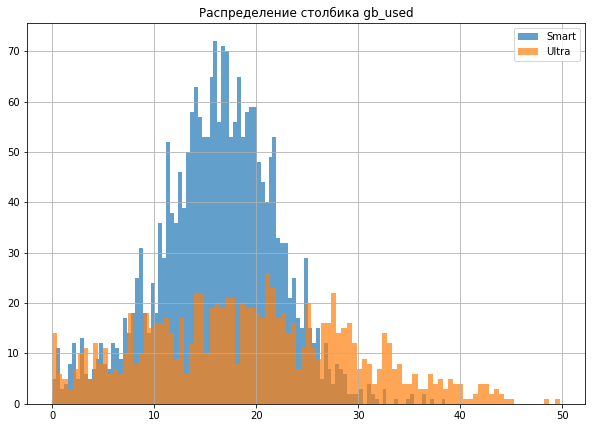

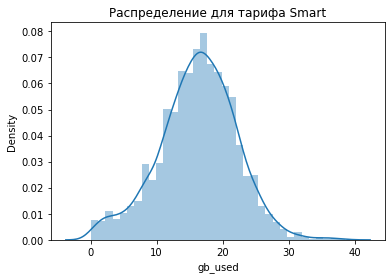

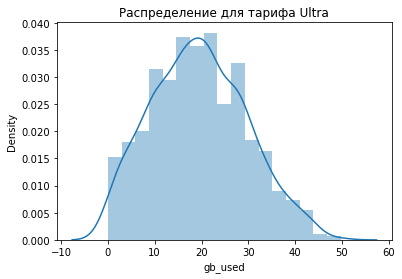

Превысили лимит в тарифе Smart:  58%
Превысили лимит в тарифе Ultra: 15%

p-значение: 6.144134032592304e-30
Отвергаем нулевую гипотезу


,tariff,mean,median,var,std
0,Smart,16.21,16.51,34.46,5.87
1,Ultra,19.47,19.31,101.75,10.09


In [38]:
indicators(smart_table['gb_used'], ultra_table['gb_used'],15,30)

В обоих случаях медианные значения почти равны средним. Распределения приближены к нормальным. В тарифе Smart немного скошено влево, в тарифе Ultra - вправо. 

В среднем пользователи тарифа Smart расходуют в месяц 16,21 гб. трафика - это выше установленного лимита в 15 гб. Его превысили в 58% наблюдений. Это означает, что более чем в половине наблюдений пользователи доплачивали за тариф как минимум 200 рублей. 

В тарифе Ultra лимит превышают реже. Превышение было зафиксировано только в 15% наблюдений, при этом доплата за превышение трафика меньше - только 150 рублей. 

### Описание использования мобильной связи

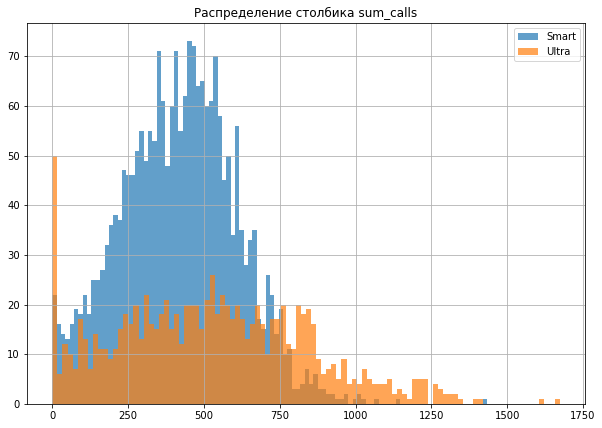

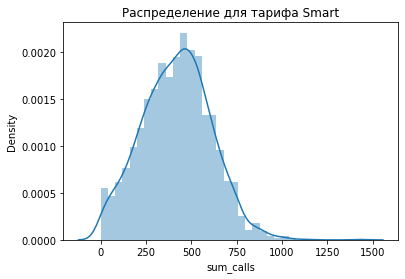

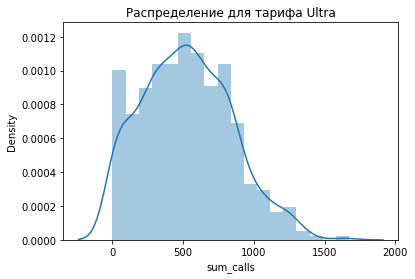

Превысили лимит в тарифе Smart:  33%
Превысили лимит в тарифе Ultra: 0%

p-значение: 1.7096649033405836e-32
Отвергаем нулевую гипотезу


,tariff,mean,median,var,std
0,Smart,417.93,422.0,36219.32,190.31
1,Ultra,526.62,518.0,100873.63,317.61


In [39]:
indicators(smart_table['sum_calls'], ultra_table['sum_calls'],500, 3000)

В тарифе Smart распределение звонков скошено влево (медиана больше среднего). В тарифе Ultra распределение звонков скошено вправо (медиана меньше среднего).

Средние двух тарифов располагаются близко друг к другу, несмотря на то, что лимит тарифа Ultras выше тарифа Smart в 6 раз. 

В тарифе Smart среднее распологается близко к пороговому значению лимита. 33% пользователей превышают его. 

В тарифе ultra максимальное наблюдение не превышает 2000 мин., что как минимум на 1000 мин. меньше порогового значения. 

### Описание использования СМС

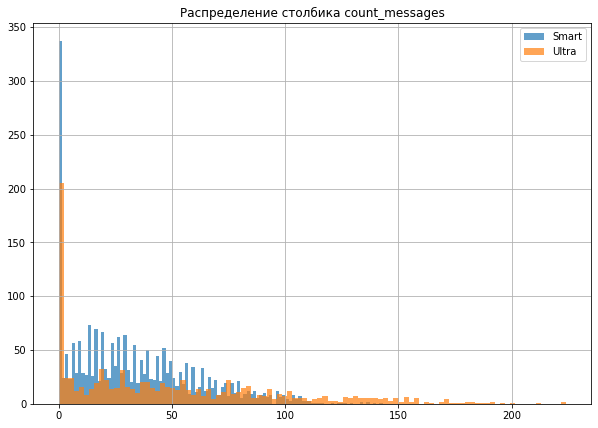

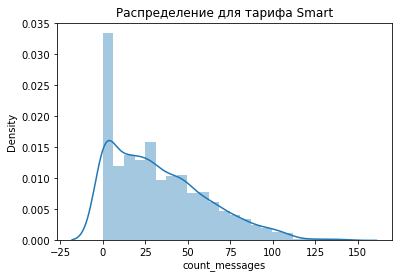

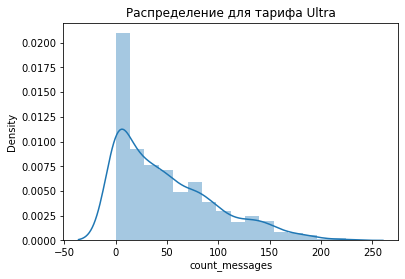

Превысили лимит в тарифе Smart:  28%
Превысили лимит в тарифе Ultra: 0%

p-значение: 1.7346624732133354e-31
Отвергаем нулевую гипотезу


,tariff,mean,median,var,std
0,Smart,33.38,28.0,796.81,28.23
1,Ultra,49.36,38.0,2285.27,47.80


In [40]:
indicators(smart_table['count_messages'], ultra_table['count_messages'], 50, 1000 )

Видим большой выброс на 0 СМС. Ошибки в данных нет, но выброс мешает посмотреть на остальное распределение. Посмотрим на график в разбросе от 1 до 200. 

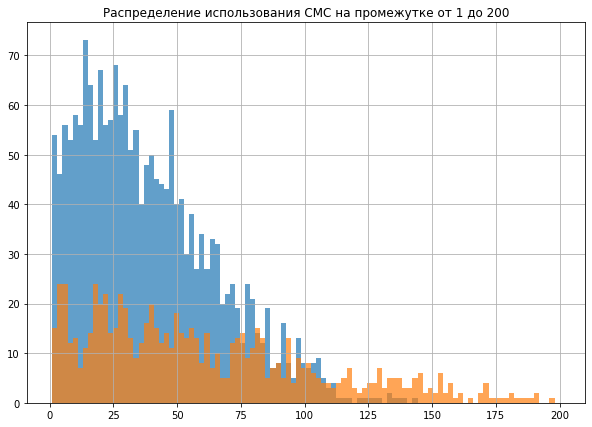

In [41]:
smart_table['count_messages'].hist(bins=100, alpha = 0.7, figsize=(10,7), range =(1,200))
ultra_table['count_messages'].hist(bins=100, alpha = 0.7, figsize=(10,7), range =(1,200))
plt.title('Распределение использования СМС на промежутке от 1 до 200')
plt.show()

Медиана меньше среднего в обоих датасетах - датасеты скошены вправо.

Снова наблюдаем похожую картину, где в тарифе Smart пользователи превышают установленный лимит и доплачивают  - 28% наблюдений. А на тарифе Ultras максимальное количество использованных SMS в месяц меньше порогового в 5 раз. 

Исходя из рассмотренных выше графиков по всем видам связи можно сказать, что поведение пользователей двух тарифов похоже. Несмотря на то, что лимиты по тарифу ultra значительно выше Smart, их средние располагаются близко друг к другу. Однако парный t-тест показал, что нет оснований утверждать что наблюдения по двум выборкам относятся к одной генеральной совокупности. 

Основное отличие, которое можно проследить между двумя тарифами, это разница в стандартных отклоениях. В тарифе Smart оно значительно меньше. Это связано с тем, что для этого тарифа лимиты установлены близко к средним значениям. Приближаясь к порогу, пользователи стараются снизить использование средств связи, чтобы не переплачивать лишние деньги. 

Пользователи тарифа Ultra ведут себя по-другому - расходуют столько связи, сколько потребуется, не  задумываясь о лимитах. 

### Сравнение средних выручки по разным тарифам

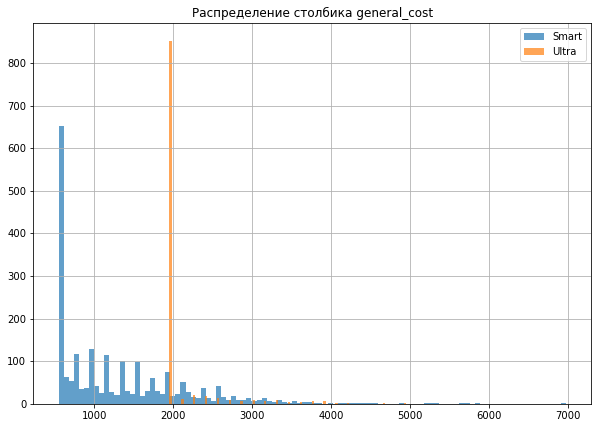

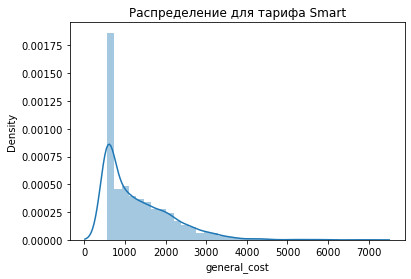

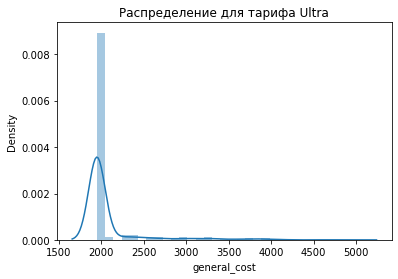

Превысили лимит в тарифе Smart:  0%
Превысили лимит в тарифе Ultra: 0%

p-значение: 1.553031575858775e-151
Отвергаем нулевую гипотезу


,tariff,mean,median,var,std
0,Smart,1303.25,1040.0,694546.61,833.39
1,Ultra,2072.44,1950.0,147981.86,384.68


In [42]:
indicators(smart_table['general_cost'], ultra_table['general_cost'],5000,5000)

Проведя парный t-тест между выборками пользователей тарифов Smart и ultra,  у нас получилось отклонить нулевую гипотезу о равенстве их генеральных совокупностей. 

Средняя выручка двух тарифов различается. Основное число пользователей по обоим тарифам умещаются в лимиты и вносят в месяц только абонентскую плату. Разница же этих абонентских плат значительна.

При этом пользователи тарифа Smart часто превышают установленные тарифом лимиты и доплачивают за перерасход. В итоге среднее и медианное значение превышает стоимость тарифа более чем в 2 раза.

#### Сравнение средних выручки по Москве и регионам

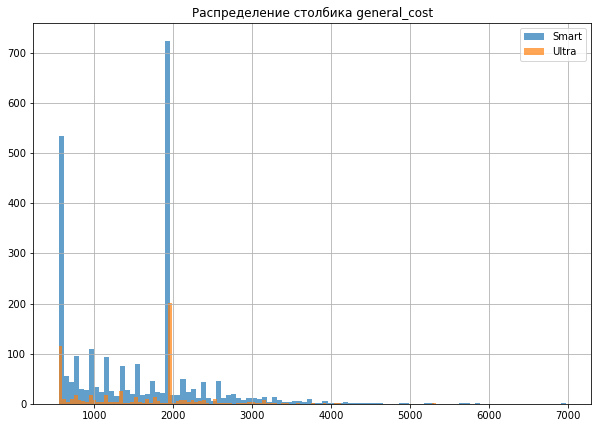

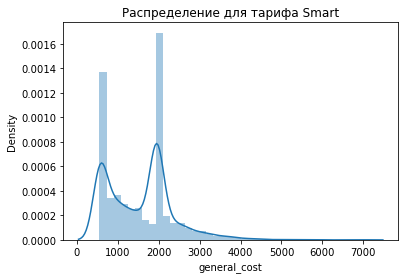

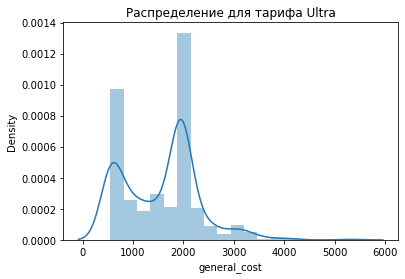

Превысили лимит в тарифе Smart:  97%
Превысили лимит в тарифе Ultra: 98%

p-значение: 0.5924817760011163
Не получилось отвергнуть нулевую гипотезу


,tariff,mean,median,var,std
0,Smart,1535.29,1622.0,671916.8,819.71
1,Ultra,1554.73,1807.0,571665.5,756.09


In [43]:
indicators(region_table['general_cost'], moscow_table['general_cost'], 1, 1)

Для этой таблицы - Smart это Regions, Ultra - Moscow.

При сравнении Москвы и регионов нулевую гипотезу отвергнуть не удалось. Региональный фактор не влияет на распределение тарифов, а следовательно и на то, сколько в среднем выручки "Мегалайн" получает из региона. 

## Общий вывод

В ходе исследования пользователей федерального мобильно оператора "Мегалайн" удалось проверить гипотезу о равенстве приносимой вырочки пользователями двух тарифов - Smart И Ultra, и проверить гипотезу о равенстве приносимой выручки между пользователями Москвы и регионов. 

При сравнения двух тарифов удалось выяснить, что пороговые значения лимитов по каждому виду связи слабо влияют на средние значения их использования. Зато пороговые значения влияют на стандартные отклонения  распределений - чем ближе порог к среднему, тем меньше стандартное отклонение. 

Сравнение выручек между двумя тарифами привело к отклонению нулевой гипотезы. Есть основания говорить, что средние выручки по двум тарифам различаются.

При сравненис выручек по Москве и регионам нам не удалось отвергнуть нулевую гипотезу - у нас нет оснований говорить, что выручки по регионам различаются. 